In [2]:
import pandas as pd 
import numpy as np 

X = pd.read_csv('../Boosts/Datasets/X.csv')
y = pd.read_csv('../Boosts/Datasets/y.csv')

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=123)

In [5]:
import joblib 

rf = joblib.load('../Boosts/SavedModels/random_forest_model.joblib')
rf

RandomForestClassifier(bootstrap=False, class_weight={0: 2, 1: 3},
                       n_estimators=175)

In [6]:
from sklearn.ensemble import AdaBoostClassifier

ensemble_model = AdaBoostClassifier(base_estimator=rf, n_estimators=10, random_state=42)
ensemble_model.fit(X_train, np.ravel(y_train))

AdaBoostClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                         class_weight={0: 2,
                                                                       1: 3},
                                                         n_estimators=175),
                   n_estimators=10, random_state=42)

In [7]:
y_pred = ensemble_model.predict(X_test)

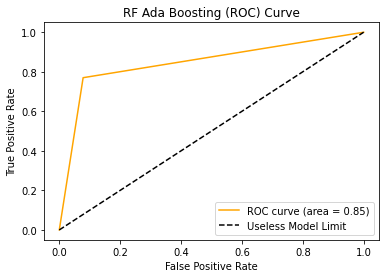

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF Ada Boosting (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('../Images/RandomForest_AdaBoosting_ROC.png')
plt.show()

In [9]:
class_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.864338,0.860887,0.863146,0.862613,0.863005
recall,0.921706,0.770072,0.863146,0.845889,0.863146
f1-score,0.892101,0.812951,0.863146,0.852526,0.861534
support,8136.000000,5119.000000,0.863146,13255.000000,13255.000000


In [10]:
ensemble_model.fit(X, np.ravel(y))

AdaBoostClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                         class_weight={0: 2,
                                                                       1: 3},
                                                         n_estimators=175),
                   n_estimators=10, random_state=42)

In [11]:
import joblib

joblib.dump(ensemble_model, "../Boosts/BoostedModels/rf_adaboost.joblib")

['../Boosts/BoostedModels/rf_adaboost.joblib']